In [1]:
import scvi
import scanpy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import scib
import anndata as ad

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
condition_key = 'embryo_id'
ref_path = '/home/icb/jonas.flor/gastrulation_atlas/scvi/500k/all_genes'

adata = sc.read("/home/icb/jonas.flor/gastrulation_atlas/scvi/training/10k/adata_without_22.h5ad")
adata

AnnData object with n_obs × n_vars = 10000 × 24552
    obs: 'cell_id', 'keep', 'day', 'embryo_id', 'experimental_batch', 'batch', 'cell_cluster', 'celltype', 'cellcluster_moscot'

In [3]:
scvi.model.SCVI.setup_anndata(adata, batch_key=condition_key)
vae = scvi.model.SCVI(
    adata,
    n_layers=10,
    n_hidden=1024,
    n_latent=50,
    #encode_covariates=True,
    #deeply_inject_covariates=False,
    use_layer_norm="both",
    use_batch_norm="none"
)
vae.train(check_val_every_n_epoch=1, max_epochs=500, early_stopping=True)
vae.save(ref_path, overwrite=True)

I0000 00:00:1696926830.123765 1016750 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scvi/data/fields/_dataframe_field.py:189: UserWarning: Category 5 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/icb/jonas.flor/mambaforge/envs/scvi/lib/python ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/lightning/fabric/pl

Epoch 136/500:  27%|███████████████████████████████████▋                                                                                               | 136/500 [07:38<20:27,  3.37s/it, v_num=1, train_loss_step=4.98e+3, train_loss_epoch=5.33e+3]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: 5353.713. Signaling Trainer to stop.


/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


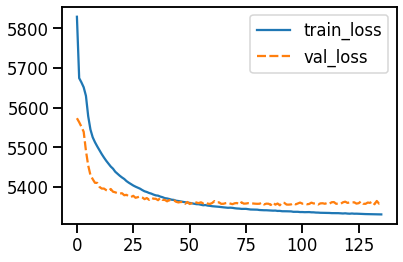

In [4]:
plot = sns.lineplot(pd.DataFrame(np.concatenate([vae.history['train_loss_epoch'], vae.history['validation_loss']], axis=1), columns=['train_loss', 'val_loss']))

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


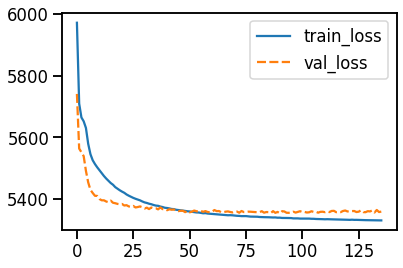

In [5]:
plot = sns.lineplot(pd.DataFrame(np.concatenate([vae.history['elbo_train'], vae.history['elbo_validation']], axis=1), columns=['train_loss', 'val_loss']))

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


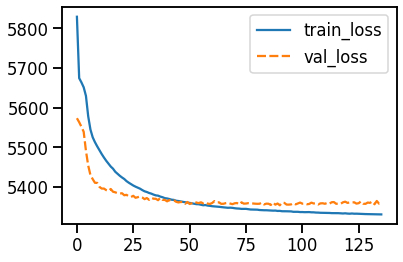

In [6]:
plot = sns.lineplot(pd.DataFrame(np.concatenate([vae.history['reconstruction_loss_train'], vae.history['reconstruction_loss_validation']], axis=1), columns=['train_loss', 'val_loss']))

In [7]:
vae.history

{'kl_weight':       kl_weight
 epoch          
 0           0.0
 1        0.0025
 2         0.005
 3        0.0075
 4          0.01
 ...         ...
 131      0.3275
 132        0.33
 133      0.3325
 134       0.335
 135      0.3375
 
 [136 rows x 1 columns],
 'train_loss_step':       train_loss_step
 epoch                
 0         5592.197266
 1         5503.639648
 2         5776.500977
 3         5471.737305
 4          5315.59082
 ...               ...
 131       5355.258789
 132       5326.921875
 133       5303.407227
 134       5165.697754
 135        5600.16748
 
 [136 rows x 1 columns],
 'validation_loss':       validation_loss
 epoch                
 0          5573.30957
 1         5563.257324
 2         5551.789551
 3         5539.070801
 4         5491.289551
 ...               ...
 131       5363.273926
 132       5356.376953
 133       5364.566406
 134       5357.890137
 135       5359.303711
 
 [136 rows x 1 columns],
 'elbo_validation':       elbo_validation
 epoch 

In [8]:
adata_int = sc.read("/home/icb/jonas.flor/gastrulation_atlas/scvi/training/10k/adata_without_22.h5ad")

In [9]:
adata_int.X = vae.get_normalized_expression()
adata_int.obsm["X_emb"] = vae.get_latent_representation()
sc.pp.log1p(adata_int)
sc.pp.neighbors(adata_int, use_rep='X_emb')
adata_int.obs.day = [float(x[1:]) for x in adata_int.obs.day]
adata_int

AnnData object with n_obs × n_vars = 10000 × 24552
    obs: 'cell_id', 'keep', 'day', 'embryo_id', 'experimental_batch', 'batch', 'cell_cluster', 'celltype', 'cellcluster_moscot'
    uns: 'log1p', 'neighbors'
    obsm: 'X_emb'
    obsp: 'distances', 'connectivities'

In [10]:
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
adata.obs.day = [float(x[1:]) for x in adata.obs.day]
adata

AnnData object with n_obs × n_vars = 10000 × 24552
    obs: 'cell_id', 'keep', 'day', 'embryo_id', 'experimental_batch', 'batch', 'cell_cluster', 'celltype', 'cellcluster_moscot', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'log1p', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [11]:
scib.me.hvg_overlap(adata, adata_int, batch_key='embryo_id')

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs

0.06402204250937356

In [12]:
scib.me.cell_cycle(adata, adata_int, batch_key='embryo_id', embed='X_emb')

ValueError: cell cycle genes not in adata
 organism: mouse
 varnames: ['ENSMUSG00000017188', 'ENSMUSG00000033487', 'ENSMUSG00000057335', 'ENSMUSG00000028607', 'ENSMUSG00000051451', 'ENSMUSG00000060771', 'ENSMUSG00000038776', 'ENSMUSG00000073805', 'ENSMUSG00000020634', 'ENSMUSG00000031667']

In [13]:
scib.me.pcr(adata, covariate='embryo_id', recompute_pca=False)

0.14742429505114216

In [14]:
scib.me.pcr(adata_int, covariate='embryo_id', embed='X_emb', recompute_pca=False)

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/anndata/_core/anndata.py:453: PendingDeprecationWarning: The dtype argument will be deprecated in anndata 0.10.0
  warnings.warn(


0.08362308877354324

In [15]:
scib.me.trajectory_conservation(adata, adata_int, pseudotime_key='day', label_key='cellcluster_moscot')

/home/icb/jonas.flor/gitrepos/scib/scib/metrics/trajectory.py:120: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  n_components, adata_post.obs["neighborhood"] = connected_components(
/home/icb/jonas.flor/gitrepos/scib/scib/metrics/trajectory.py:124: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  start_clust = adata_pre.obs.groupby([ct_key]).mean()[pseudotime_key].idxmin()


0.4919329920256664

In [16]:
scib.me.graph_connectivity(adata, label_key="cellcluster_moscot")

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
S

0.9216876190086285

In [17]:
scib.me.graph_connectivity(adata_int, label_key="cellcluster_moscot")

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
S

0.6240953264885668

In [18]:
scib.me.silhouette(adata, label_key='cellcluster_moscot', embed='X_pca')

0.43953491747379303

In [19]:
scib.me.silhouette(adata_int, label_key='cellcluster_moscot', embed='X_emb')

0.40197302401065826

In [40]:
scib.me.silhouette_batch(adata, batch_key='embryo_id', label_key='cellcluster_moscot', embed='X_pca', return_all=True)

mean silhouette per group:                                    silhouette_score
group                                              
Aidpocytes                                 0.705506
B_cells                                    0.604653
CNS_neurons                                0.762459
Cardiocytes                                0.759992
Definitive_erythroid                       0.636170
Endothelium                                0.583970
Ependymal_cells                            0.655416
Epithelial_cells                           0.626504
Eye_and_other                              0.719839
Gut                                        0.783052
Hepatocytes                                0.700920
Intermediate_mesoderm_and_kidney           0.746424
Intermediate_neuronal_progenitors          0.741106
Intestine                                  0.641868
Lung_and_airways                           0.599020
Mast_cells                                 0.805086
Megakaryocytes                       

(0.7025333796871435,
                                    silhouette_score
 group                                              
 Aidpocytes                                 0.705506
 B_cells                                    0.604653
 CNS_neurons                                0.762459
 Cardiocytes                                0.759992
 Definitive_erythroid                       0.636170
 Endothelium                                0.583970
 Ependymal_cells                            0.655416
 Epithelial_cells                           0.626504
 Eye_and_other                              0.719839
 Gut                                        0.783052
 Hepatocytes                                0.700920
 Intermediate_mesoderm_and_kidney           0.746424
 Intermediate_neuronal_progenitors          0.741106
 Intestine                                  0.641868
 Lung_and_airways                           0.599020
 Mast_cells                                 0.805086
 Megakaryocytes          

In [21]:
scib.me.silhouette_batch(adata_int, batch_key='embryo_id', label_key='cellcluster_moscot', embed='X_emb')

mean silhouette per group:                                    silhouette_score
group                                              
Aidpocytes                                 0.764150
B_cells                                    0.681418
CNS_neurons                                0.717477
Cardiocytes                                0.839577
Definitive_erythroid                       0.608848
Endothelium                                0.630297
Ependymal_cells                            0.818798
Epithelial_cells                           0.612017
Eye_and_other                              0.624939
Gut                                        0.788537
Hepatocytes                                0.694145
Intermediate_mesoderm_and_kidney           0.673969
Intermediate_neuronal_progenitors          0.722088
Intestine                                  0.695237
Lung_and_airways                           0.789516
Mast_cells                                 0.852001
Megakaryocytes                       

0.7036577979236454

In [22]:
scib.me.isolated_labels_asw(adata, label_key='cellcluster_moscot', batch_key='embryo_id', embed='X_pca')

isolated labels: no more than 2 batches per label
Primordial_germ_cells: 0.5522747188806534


0.5522747188806534

In [23]:
scib.me.isolated_labels_asw(adata_int, label_key='cellcluster_moscot', batch_key='embryo_id', embed='X_emb')

isolated labels: no more than 2 batches per label
Primordial_germ_cells: 0.3540465980768204


0.3540465980768204

In [24]:
scib.me.clisi_graph(adata, label_key='cellcluster_moscot', type_='full')

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs

0.9986451990292099

In [25]:
scib.me.clisi_graph(adata_int, label_key='cellcluster_moscot', type_='embed')

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs

0.9788655898237153

In [26]:
scib.me.ilisi_graph(adata, batch_key='embryo_id', type_='full')

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs

0.10145174828353146

In [27]:
scib.me.ilisi_graph(adata_int, batch_key='embryo_id', type_='embed')

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs

0.11501274934717705

In [29]:
scib.me.cluster_optimal_resolution(adata, label_key='cellcluster_moscot', cluster_key='Leiden')
scib.me.ari(adata, cluster_key='Leiden', label_key='cellcluster_moscot')

resolution: 0.1, nmi: 0.7336311571546738
resolution: 0.2, nmi: 0.8088009996275269
resolution: 0.3, nmi: 0.7803961716159995
resolution: 0.4, nmi: 0.77485907212512
resolution: 0.5, nmi: 0.7490543200417615
resolution: 0.6, nmi: 0.7382790220020857
resolution: 0.7, nmi: 0.729294661735441
resolution: 0.8, nmi: 0.7280737668715419
resolution: 0.9, nmi: 0.7216827815563222
resolution: 1.0, nmi: 0.7254604027297763
resolution: 1.1, nmi: 0.7235647879116625
resolution: 1.2, nmi: 0.7086214428750459
resolution: 1.3, nmi: 0.704940364351113
resolution: 1.4, nmi: 0.690247711829197
resolution: 1.5, nmi: 0.6854602565488176
resolution: 1.6, nmi: 0.6881190635119119
resolution: 1.7, nmi: 0.6858500053831141
resolution: 1.8, nmi: 0.6745036736396793
resolution: 1.9, nmi: 0.6713182993592631
resolution: 2.0, nmi: 0.6628206775877612
optimised clustering against cellcluster_moscot
optimal cluster resolution: 0.2
optimal score: 0.8088009996275269


0.7466607639363487

In [31]:
scib.me.cluster_optimal_resolution(adata_int, label_key='cellcluster_moscot', cluster_key='Leiden')
scib.me.ari(adata_int, cluster_key='Leiden', label_key='cellcluster_moscot')

resolution: 0.1, nmi: 0.4557765943952046
resolution: 0.2, nmi: 0.4499750174416307
resolution: 0.3, nmi: 0.4882373931549426
resolution: 0.4, nmi: 0.48321517402283265
resolution: 0.5, nmi: 0.4614949429210553
resolution: 0.6, nmi: 0.4766689983106893
resolution: 0.7, nmi: 0.4769416375632098
resolution: 0.8, nmi: 0.46562535606726824
resolution: 0.9, nmi: 0.4652905045069137
resolution: 1.0, nmi: 0.4716486066378852
resolution: 1.1, nmi: 0.471391232940899
resolution: 1.2, nmi: 0.4691926480231256
resolution: 1.3, nmi: 0.4691461375784511
resolution: 1.4, nmi: 0.46303657778410623
resolution: 1.5, nmi: 0.46756903660218735
resolution: 1.6, nmi: 0.4811164052198983
resolution: 1.7, nmi: 0.47296324055741706
resolution: 1.8, nmi: 0.46831916804942225
resolution: 1.9, nmi: 0.459820699202239
resolution: 2.0, nmi: 0.46430063169584507
optimised clustering against cellcluster_moscot
optimal cluster resolution: 0.3
optimal score: 0.4882373931549426


0.3333457282307054

In [33]:
scib.me.nmi(adata, cluster_key='Leiden', label_key='cellcluster_moscot')

0.808800999627527

In [34]:
scib.me.nmi(adata_int, cluster_key='Leiden', label_key='cellcluster_moscot')

0.48823739315494263

In [36]:
scib.me.isolated_labels_f1(adata, batch_key='embryo_id', label_key='cellcluster_moscot', embed=None)

isolated labels: no more than 2 batches per label
Primordial_germ_cells: 0.028368794326241138


0.028368794326241138

In [37]:
scib.me.isolated_labels_f1(adata_int, batch_key='embryo_id', label_key='cellcluster_moscot', embed=None)

isolated labels: no more than 2 batches per label
Primordial_germ_cells: 0.011363636363636362


0.011363636363636362

In [42]:
scib_metrics = pd.DataFrame(
    data={'n_obs': [adata.n_obs]}
)
scib_metrics['hgv_overlap'] = scib.me.hvg_overlap(adata, adata_int, batch_key='embryo_id')
scib_metrics['pcr_unintegrated'] = scib.me.pcr(adata, covariate='embryo_id', recompute_pca=False)
scib_metrics['pcr_integrated'] = scib.me.pcr(adata_int, covariate='embryo_id', embed='X_emb', recompute_pca=False)
scib_metrics['traject_conversation'] = scib.me.trajectory_conservation(adata, adata_int, pseudotime_key='day', label_key='cellcluster_moscot')
scib_metrics['graph_connectivity_unintegrated'] = scib.me.graph_connectivity(adata, label_key="cellcluster_moscot")
scib_metrics['graph_connectivity_integrated'] = scib.me.graph_connectivity(adata_int, label_key="cellcluster_moscot")
scib_metrics['silhouette_unintegrated'] = scib.me.silhouette(adata, label_key='cellcluster_moscot', embed='X_pca')
scib_metrics['silhouette_integrated'] = scib.me.silhouette(adata_int, label_key='cellcluster_moscot', embed='X_emb')
scib_metrics['silhouette_batch_unintegrated'] = scib.me.silhouette_batch(adata, batch_key='embryo_id', label_key='cellcluster_moscot', embed='X_pca', return_all=True)[0]
scib_metrics['silhouette_batch_integrated'] = scib.me.silhouette_batch(adata_int, batch_key='embryo_id', label_key='cellcluster_moscot', embed='X_emb', return_all=True)[0]
scib_metrics['ASW_unintegrated'] = scib.me.isolated_labels_asw(adata, label_key='cellcluster_moscot', batch_key='embryo_id', embed='X_pca')
scib_metrics['ASW_integrated'] = scib.me.isolated_labels_asw(adata_int, label_key='cellcluster_moscot', batch_key='embryo_id', embed='X_emb')
scib_metrics['cLISI_unintegrated'] = scib.me.clisi_graph(adata, label_key='cellcluster_moscot', type_='full')
scib_metrics['cLISI_integrated'] = scib.me.clisi_graph(adata_int, label_key='cellcluster_moscot', type_='embed')
scib_metrics['iLISI_unintegrated'] = scib.me.ilisi_graph(adata, batch_key='embryo_id', type_='full')
scib_metrics['iLISI_integrated'] = scib.me.ilisi_graph(adata_int, batch_key='embryo_id', type_='embed')
scib_metrics['iso_labels_unintegrated'] = scib.me.isolated_labels_f1(adata, batch_key='embryo_id', label_key='cellcluster_moscot', embed=None)
scib_metrics['iso_labels_integrated'] = scib.me.isolated_labels_f1(adata_int, batch_key='embryo_id', label_key='cellcluster_moscot', embed=None)

scib.me.cluster_optimal_resolution(adata, label_key='cellcluster_moscot', cluster_key='Leiden')
scib.me.cluster_optimal_resolution(adata_int, label_key='cellcluster_moscot', cluster_key='Leiden')

scib_metrics['ari_unintegrated'] = scib.me.ari(adata, cluster_key='Leiden', label_key='cellcluster_moscot')
scib_metrics['ari_integrated'] = scib.me.ari(adata_int, cluster_key='Leiden', label_key='cellcluster_moscot')
scib_metrics['nmi_unintegrated'] = scib.me.nmi(adata, cluster_key='Leiden', label_key='cellcluster_moscot')
scib_metrics['nmi_integrated'] = scib.me.nmi(adata_int, cluster_key='Leiden', label_key='cellcluster_moscot')
scib_metrics

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs

mean silhouette per group:                                    silhouette_score
group                                              
Aidpocytes                                 0.705506
B_cells                                    0.604653
CNS_neurons                                0.762459
Cardiocytes                                0.759992
Definitive_erythroid                       0.636170
Endothelium                                0.583970
Ependymal_cells                            0.655416
Epithelial_cells                           0.626504
Eye_and_other                              0.719839
Gut                                        0.783052
Hepatocytes                                0.700920
Intermediate_mesoderm_and_kidney           0.746424
Intermediate_neuronal_progenitors          0.741106
Intestine                                  0.641868
Lung_and_airways                           0.599020
Mast_cells                                 0.805086
Megakaryocytes                       

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs

isolated labels: no more than 2 batches per label
Primordial_germ_cells: 0.028368794326241138
isolated labels: no more than 2 batches per label
Primordial_germ_cells: 0.011363636363636362
resolution: 0.1, nmi: 0.7336311571546738
resolution: 0.2, nmi: 0.8088009996275269
resolution: 0.3, nmi: 0.7803961716159995
resolution: 0.4, nmi: 0.77485907212512
resolution: 0.5, nmi: 0.7490543200417615
resolution: 0.6, nmi: 0.7382790220020857
resolution: 0.7, nmi: 0.729294661735441
resolution: 0.8, nmi: 0.7280737668715419
resolution: 0.9, nmi: 0.7216827815563222
resolution: 1.0, nmi: 0.7254604027297763
resolution: 1.1, nmi: 0.7235647879116625
resolution: 1.2, nmi: 0.7086214428750459
resolution: 1.3, nmi: 0.704940364351113
resolution: 1.4, nmi: 0.690247711829197
resolution: 1.5, nmi: 0.6854602565488176
resolution: 1.6, nmi: 0.6881190635119119
resolution: 1.7, nmi: 0.6858500053831141
resolution: 1.8, nmi: 0.6745036736396793
resolution: 1.9, nmi: 0.6713182993592631
resolution: 2.0, nmi: 0.66282067758776

,n_obs,hgv_overlap,pcr_unintegrated,pcr_integrated,traject_conversation,graph_connectivity_unintegrated,graph_connectivity_integrated,silhouette_unintegrated,silhouette_integrated,silhouette_batch_unintegrated,...,cLISI_unintegrated,cLISI_integrated,iLISI_unintegrated,iLISI_integrated,iso_labels_unintegrated,iso_labels_integrated,ari_unintegrated,ari_integrated,nmi_unintegrated,nmi_integrated
0,10000,0.064022,0.147424,0.083623,0.491933,0.921688,0.624095,0.439535,0.401973,0.702533,...,0.998645,0.978866,0.101452,0.115013,0.028369,0.011364,0.746661,0.333346,0.808801,0.488237


In [43]:
scib_metrics.to_csv('/home/icb/jonas.flor/gastrulation_atlas/scvi/training/10k/all_genes/metrics/scib_metrics.csv')